# DSH example for O$_2$sclpy

See the O$_2$sclpy documentation at
https://awsteiner.org/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import numpy
import sys

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the O$_2$scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl()

Get a copy (a pointer to) the O$_2$scl unit conversion object, which
also allows access to the constant library, then get ħc.

In [3]:
cu=link.o2scl_settings.get_convert_units()
ħc=cu.find_unique('hbarc','MeV*fm')
print('ħc = %7.6e\n' % (ħc))

ħc = 1.973270e+02



Use the cloud_file object to download the EOS

In [5]:
cf=o2sclpy.cloud_file(link)
cf.verbose=1
cf.get_file('dsh.o2','https://isospin.roam.utk.edu/public_data'+
            '/eos_tables/du21/fid_3_5_22.o2')

Function cloud_file::get_file_hash() succeeded to obtain file named 'dsh.o2'.


0

Read the tensor which stores the average mass number

In [6]:
hf=o2sclpy.hdf_file(link)
tg_A=o2sclpy.tensor_grid(link)
hf.open('dsh.o2')
o2sclpy.hdf_input_tensor_grid(link,hf,tg_A,'A')
hf.close()

In order to make a plot at fixed Ye, we first need to construct a
tensor index object. We want to include all values of nB (index 0 in
the tensor object) and all values of T (index 2 in the tensor
object), but for Ye, we select the value in the grid which is
closest to Ye=0.4.

In [7]:
ix=o2sclpy.std_vector_size_t(link)
ix.resize(3)
ix[1]=tg_A.lookup_grid(1,0.4)

Create a table3d object

In [8]:
t3d=o2sclpy.table3d(link)
tg_A.copy_table3d_align_setxy(0,2,ix,t3d,'nB','T','A')

Now plot the results. Raw matplotlib works, but o2sclpy has
a couple functions which make it easier. 

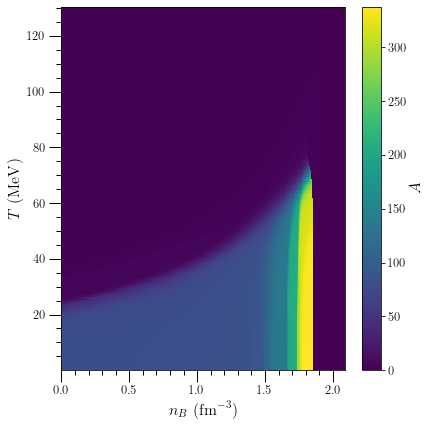

In [9]:
if plots:
    pl=o2sclpy.plot_base()
    pl.colbar=True
    pl.xtitle(r'$ n_B~(\mathrm{fm}^{-3}) $')
    pl.ytitle(r'$ T~(\mathrm{MeV}) $')
    pl.ttext(1.25,0.5,u'$ A $',rotation=90)
    pl.den_plot(t3d,'A')
    plot.show()

For testing purposes

In [10]:
def test_fun():
    assert numpy.allclose(t3d.get(0,0,'A'),81,rtol=0.1)
    return